<a href="https://colab.research.google.com/github/dev02chandan/ATML/blob/main/One_Class_SVM_Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aim:**
To explore and implement one class SVM for anomaly detection.

Explore and summarize the paper given in the link below:

https://ieeexplore.ieee.org/abstract/document/1260106/references#references.

According to the authors, Intrusion detection is an urgent task to be addressed for assurign computer and information security. The paper has made a deep analysis on attacks and misuses patterns in log files. They continue to propose an approach using One-Class Support Vector Machines, trained with abstracted user audit logs from 1999 DARPA.

The most popular way to detect intrusions has been by
using the audit data generated by the operating system. An
audit trail is a record of activities on a system that are
logged to a file in chronologically sorted order.

**One-class SVM:** Bemhard Scholkopf et al. suggested
a method of adapting the SVM methodology to the
one-class classification problem. Essentially, aftet
transforming the feature via a kernel, they treated the origin
as the only member of the second class. By introducing
“relaxation parameters”, they separate the image of the one
class from the origin.

The basic idea is to work first in the feature space, and
assume that not only is the origin in the second class, but
also that all data points “close enough” to the origin are to
be considered as outliers or anomaly data points.

The authors conclude by summarising their approach to intrusion detection using SVM's and show high accuarcy on the testing set.


### **Implement one class SVM on a synthetic dataset created using make_classification.**

· Create a synthetic dataset in the ratio of 0.99:0.01 for normal and anomaly dataset.

· Split it into train and test.

· Apply one class SVM by choosing appropriate parameters.

· Plot the confusion matrix and determine the performance of the algorithm.

In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [2]:
# Create synthetic dataset with 0.99:0.01 ratio for normal and anomaly data using the weights parameter
X, y = make_classification(n_samples=10000, n_features=7, n_informative=5, n_redundant=2,
                           n_classes=2, weights=[0.99], flip_y=0, random_state=42)


In [3]:
# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X))
X = X[shuffle_idx]
y = y[shuffle_idx]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 7), (2000, 7), (8000,), (2000,))

In [6]:
from sklearn.svm import OneClassSVM

In [7]:
# Initialize and fit the One-Class SVM model again
one_class_svm = OneClassSVM(kernel='rbf', nu=0.1, gamma='auto')
one_class_svm.fit(X_train[y_train == 1])

OneClassSVM(gamma='auto', nu=0.1)

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Make predictions on the test set
y_pred = one_class_svm.predict(X_test)
y_pred = (y_pred == 1).astype(int)

In [10]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

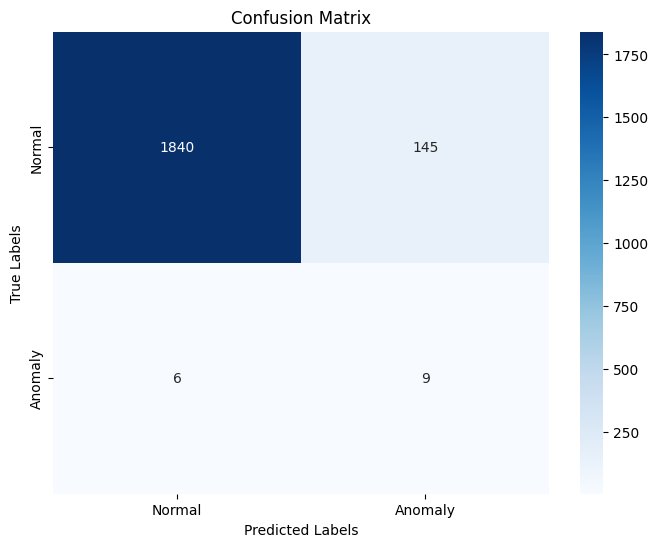

In [11]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### **Anomaly detection using one class SVM for intrusion detection.**

· Choose a dataset for intrusion detection algorithm.

· Apply one class SVM and determine the performance.

· Compare the performance with LOF.

In [12]:
import zipfile
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import LocalOutlierFactor

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
zip_file_path = '/content/drive/MyDrive/ATML/MachineLearningCSV.zip'

In [18]:
extraction_dir = '/content/'

In [19]:
csv_file_path = os.path.join(extraction_dir, 'MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')

In [20]:
# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

In [22]:
# Load a small subset of the dataset (5% of the rows)
skip_rows = lambda i: i > 0 and np.random.rand() > 0.05
df_subset = pd.read_csv(csv_file_path, skiprows=skip_rows, low_memory=False)

In [23]:
# Replace infinite values with NaN and impute with median
df_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
df_subset.fillna(df_subset.median(), inplace=True)

<ipython-input-23-2ac14f9a48c7>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_subset.fillna(df_subset.median(), inplace=True)


In [24]:
# Separate features and labels
X = df_subset.drop(' Label', axis=1)
y = df_subset[' Label'].apply(lambda x: 'BENIGN' if x == 'BENIGN' else 'ATTACK')

In [25]:
# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)



In [27]:
# Initialize and fit One-Class SVM model
one_class_svm = OneClassSVM(kernel='rbf', nu=0.1, gamma=0.01)
y_train_normal = y_train == 'BENIGN'
one_class_svm.fit(X_train[y_train_normal])
y_test_pred_svm = one_class_svm.predict(X_test)
y_test_pred_svm = ['BENIGN' if pred == 1 else 'ATTACK' for pred in y_test_pred_svm]


In [28]:
# Evaluate One-Class SVM
one_class_svm_report = classification_report(y_test, y_test_pred_svm, target_names=['ATTACK', 'BENIGN'])


In [29]:
# Initialize and fit Local Outlier Factor (LOF) model
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
y_test_pred_lof = lof.fit_predict(X_test)
y_test_pred_lof = ['BENIGN' if pred == 1 else 'ATTACK' for pred in y_test_pred_lof]

In [30]:
# Evaluate LOF
lof_report = classification_report(y_test, y_test_pred_lof, target_names=['ATTACK', 'BENIGN'])

In [32]:
one_class_svm_report

'              precision    recall  f1-score   support\n\n      ATTACK       0.80      0.65      0.72      3819\n      BENIGN       0.82      0.91      0.86      6567\n\n    accuracy                           0.81     10386\n   macro avg       0.81      0.78      0.79     10386\nweighted avg       0.81      0.81      0.81     10386\n'

In [34]:
lof_report

'              precision    recall  f1-score   support\n\n      ATTACK       0.34      0.09      0.14      3819\n      BENIGN       0.63      0.90      0.74      6567\n\n    accuracy                           0.60     10386\n   macro avg       0.48      0.49      0.44     10386\nweighted avg       0.52      0.60      0.52     10386\n'

### **One-Class SVM:**
Precision: High for both ATTACK (0.80) and BENIGN (0.82) classes.

Recall: Fairly high for ATTACK (0.65) and very high for BENIGN (0.91).

F1-score: Good balance between precision and recall for both classes (0.72 for ATTACK, 0.86 for BENIGN).

Overall Accuracy: High (0.81).

### **Local Outlier Factor (LOF):**
Precision: Low for ATTACK (0.34) and moderate for BENIGN (0.63).

Recall: Very low for ATTACK (0.09) but high for BENIGN (0.90).

F1-score: Poor for ATTACK (0.14) but decent for BENIGN (0.74).

Overall Accuracy: Moderate (0.60).

### **Comparative Analysis:**
Precision: One-Class SVM has significantly higher precision than LOF, particularly for identifying attacks.

Recall: One-Class SVM also has better recall for detecting attacks, capturing a larger proportion of actual attack instances.

F1-Score: The F1-score for One-Class SVM is much higher, indicating a better balance between precision and recall.

Overall Accuracy: The overall accuracy for One-Class SVM is considerably higher than for LOF.

### **Conclusion:**
Based on these metrics, One-Class SVM is clearly the better performing algorithm for this particular intrusion detection task. It has higher precision, recall, and overall accuracy, making it a more reliable choice for identifying anomalous behavior in network traffic.

In [35]:
%%shell
jupyter nbconvert --to html /content/One_Class_SVM_Outlier_Detection.ipynb

[NbConvertApp] Converting notebook /content/One_Class_SVM_Outlier_Detection.ipynb to html
[NbConvertApp] Writing 650579 bytes to /content/One_Class_SVM_Outlier_Detection.html
